In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from streaming.models.inputs import SimulationMeasurements
from streaming.models import stream
import copy
import pickle

In [2]:
from streaming.moments.vary_moments import (ModifyMoments, 
                                            increase, decrease,
                                            gradual_increase, gradual_decrease)

In [3]:
import matplotlib.font_manager
import matplotlib as mpl
mpl.style.use('~/StreamingModel/streaming/utils/mplstyle')
from streaming.utils import plot_tools as pt


In [4]:
pdf_filename = "../data/pairwise_velocity_pdf.hdf5"
tpcf_filename = "../data/tpcf.hdf5"

simulation = SimulationMeasurements(pdf_filename, tpcf_filename)

simulation_stream = stream.Stream(simulation, model = 'measured')

skewt = stream.Stream(simulation, 'skewt')

Found ST parameters from moments


In [6]:
skewt = stream.Stream(simulation, 'skewt')

Found ST parameters from moments


In [7]:
mf = ModifyMoments(simulation)

Found ST parameters from moments
Found ST parameters from moments
Found ST parameters from moments
Found ST parameters from moments


/cosma/local/pythonconda3/4.5.4/lib/python3.6/site-packages/scipy/optimize/minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/cosma/home/dp004/dc-cues1/StreamingModel/streaming/models/skewt/moments2pdf.py:105: RuntimeWarning: overflow encountered in double_scalars
  b_dof = (dof/np.pi)**0.5 * gamma(0.5*(dof - 1))/gamma(0.5*dof)
/cosma/home/dp004/dc-cues1/StreamingModel/streaming/models/skewt/moments2pdf.py:113: RuntimeWarning: overflow encountered in double_scalars
  b_dof = (dof/np.pi)**0.5 * gamma(0.5*(dof - 1))/gamma(0.5*dof)
/cosma/local/pythonconda3/4.5.4/lib/python3.6/site-packages/scipy/optimize/minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


Found ST parameters from moments
Found ST parameters from moments
Found ST parameters from moments
Found ST parameters from moments
Found ST parameters from moments
Found ST parameters from moments
Found ST parameters from moments
Found ST parameters from moments


(0, 60)

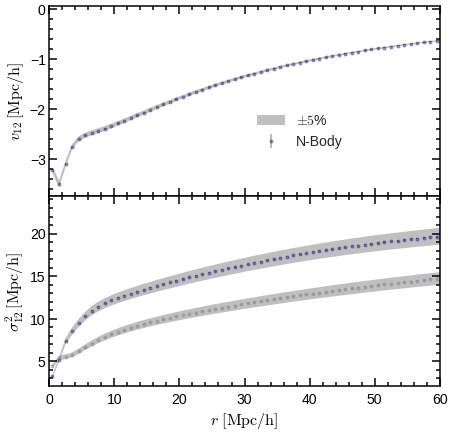

In [36]:
alpha_value = 0.4
fig, axes = plt.subplots(nrows=2,
                         ncols=1,sharex=True,
                        figsize = (7,7),
                         gridspec_kw = {'wspace':0, 'hspace':0})
# --------------- Mean --------------------------------------
axes[0].errorbar(simulation.r, 
             simulation.m_10.mean(simulation.r),
             yerr = simulation.m_10.std, linestyle = '',
             marker = 'o', color = 'midnightblue',
             label = 'N-Body', alpha = alpha_value)

axes[0].fill_between(simulation.r,
                 increase(simulation, 'm_10', 0.02)(simulation.r),
                 decrease(simulation, 'm_10', 0.02)(simulation.r),
                 facecolor = 'gray', alpha = 0.5, label = '$\pm 5$%'
                )

axes[0].set_ylabel('$v_{12} \, \mathrm{[Mpc/h]}$')
axes[0].legend( bbox_to_anchor = (0.5,0.5), frameon=False)

# --------------- STD --------------------------------------

axes[1].errorbar(simulation.r, 
             simulation.c_20.mean(simulation.r),
             yerr = simulation.c_20.std, linestyle = '',
             marker = 'o', color = 'midnightblue',
             label = 'Radial', alpha = alpha_value)

axes[1].fill_between(simulation.r,
                 increase(simulation, 'c_20', 0.05)(simulation.r),
                 decrease(simulation, 'c_20', 0.05)(simulation.r),
                 facecolor = 'gray', alpha = 0.5
                )

axes[1].errorbar(simulation.r, 
             simulation.c_02.mean(simulation.r), linestyle = '',
             yerr = simulation.c_02.std,marker = 'o', alpha = alpha_value,
             color = 'slategray', label = 'Tangential')


axes[1].fill_between(simulation.r,
                 increase(simulation, 'c_02', 0.05)(simulation.r),
                 decrease(simulation, 'c_02', 0.05)(simulation.r),
                 facecolor = 'gray', alpha = 0.5
                )

axes[1].set_ylabel('$\sigma_{12}^2 \, \mathrm{[Mpc/h]}$')

axes[1].set_xlabel('$r \, \, \mathrm{[Mpc/h]}$')
plt.xlim(0, 60)

## Varying by 5%

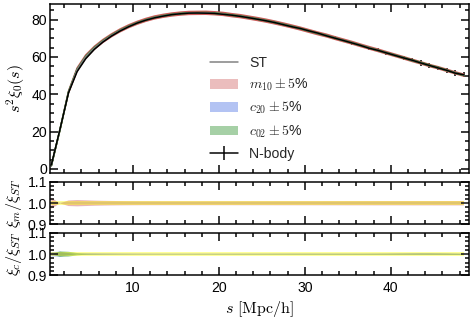

In [44]:
attribute = 'monopole'

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3,sharex = True, squeeze = True,
   gridspec_kw = {'wspace':0, 'hspace':0.1, 'height_ratios':[4,1, 1]})

measured_attribute  = getattr(simulation, attribute)
ax1.errorbar(simulation.s_c, 
    simulation.s_c **2* measured_attribute.mean,
    yerr = simulation.s_c**2* measured_attribute.std,
    label = 'N-body ', color='black')

ax1.plot(simulation.s_c,
        simulation.s_c**2 * getattr(mf.m_10.increase, attribute),
        color = 'indianred')
ax1.plot(simulation.s_c,
        simulation.s_c**2 * getattr(mf.m_10.decrease, attribute),
        color = 'indianred')

ax1.plot(simulation.s_c,
        simulation.s_c**2 * getattr(mf.c_20.increase, attribute),
        color = 'forestgreen')
ax1.plot(simulation.s_c,
        simulation.s_c**2 * getattr(mf.c_20.decrease, attribute),
        color = 'forestgreen')



ax1.plot(simulation.s_c,
        simulation.s_c**2 * getattr(skewt, attribute),
        color = 'gray', label = 'ST')

ax1.fill_between(simulation.s_c, simulation.s_c**2 *getattr(mf.m_10.increase, attribute),
                 simulation.s_c**2 *getattr(mf.m_10.decrease, attribute), facecolor = 'indianred',
                alpha = 0.4, label = '$m_{10} \pm 5$%')

ax1.fill_between(simulation.s_c, simulation.s_c**2 *getattr(mf.c_20.increase, attribute),
                 simulation.s_c**2 *getattr(mf.c_20.decrease, attribute), facecolor = 'royalblue',
                alpha = 0.4, label = '$c_{20} \pm 5$%')

ax1.fill_between(simulation.s_c, simulation.s_c**2 *getattr(mf.c_02.increase, attribute),
                 simulation.s_c**2 *getattr(mf.c_02.decrease, attribute), facecolor = 'forestgreen',
                alpha = 0.4, label = '$c_{02} \pm 5$%')


ax2.fill_between(simulation.s_c,
                 getattr(mf.m_10.increase, attribute)/ getattr(skewt, attribute),
                 getattr(mf.m_10.decrease, attribute)/ getattr(skewt, attribute),
                 facecolor = 'indianred',
                 alpha = 0.45)

ax2.set_ylim(0.9,1.1)

ax2.fill_between(simulation.s_c,0.99, 1.01, facecolor = 'yellow', alpha = 0.4)

ax2.axhline(y = 1., linestyle='-', color='gray', alpha = 0.2)




ax3.fill_between(simulation.s_c,
                 getattr(mf.c_20.increase, attribute)/ getattr(skewt, attribute),
                 getattr(mf.c_20.decrease, attribute)/ getattr(skewt, attribute),
                 facecolor = 'royalblue',
                 alpha = 0.45)



ax3.fill_between(simulation.s_c,
                 getattr(mf.c_02.increase, attribute)/ getattr(skewt, attribute),
                 getattr(mf.c_02.decrease, attribute)/ getattr(skewt, attribute),
                 facecolor = 'forestgreen',
                 alpha = 0.45)


ax3.set_ylim(0.9,1.1)

ax3.fill_between(simulation.s_c,0.99, 1.01, facecolor = 'yellow', alpha = 0.4)

ax3.axhline(y = 1., linestyle='-', color='gray', alpha = 0.2)

ax1.set_xlim(0.4, 49.1)

ax1.set_ylabel(r'$s^2 \xi_0(s)$')

ax3.set_xlabel('$s \, \, \mathrm{[Mpc/h]}$')
ax2.set_ylabel(r'$\xi_{m}/\xi_{ST}$')
ax3.set_ylabel(r'$\xi_{c}/\xi_{ST}$')
ax1.legend()

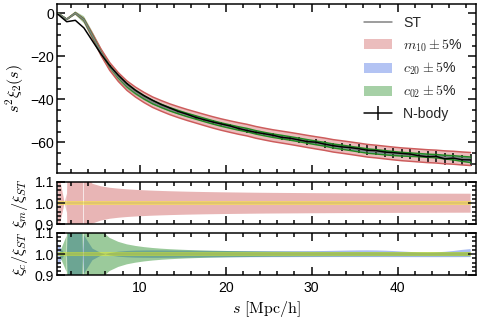

In [54]:
attribute = 'quadrupole'

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3,sharex = True, squeeze = True,
   gridspec_kw = {'wspace':0, 'hspace':0.1, 'height_ratios':[4,1, 1]})

measured_attribute  = getattr(simulation, attribute)
ax1.errorbar(simulation.s_c, 
    simulation.s_c **2* measured_attribute.mean,
    yerr = simulation.s_c**2* measured_attribute.std,
    label = 'N-body ', color='black')

ax1.plot(simulation.s_c,
        simulation.s_c**2 * getattr(mf.m_10.increase, attribute),
        color = 'indianred')
ax1.plot(simulation.s_c,
        simulation.s_c**2 * getattr(mf.m_10.decrease, attribute),
        color = 'indianred')

ax1.plot(simulation.s_c,
        simulation.s_c**2 * getattr(mf.c_20.increase, attribute),
        color = 'forestgreen')
ax1.plot(simulation.s_c,
        simulation.s_c**2 * getattr(mf.c_20.decrease, attribute),
        color = 'forestgreen')



ax1.plot(simulation.s_c,
        simulation.s_c**2 * getattr(skewt, attribute),
        color = 'gray', label = 'ST')

ax1.fill_between(simulation.s_c, simulation.s_c**2 *getattr(mf.m_10.increase, attribute),
                 simulation.s_c**2 *getattr(mf.m_10.decrease, attribute), facecolor = 'indianred',
                alpha = 0.4, label = '$m_{10} \pm 5$%')

ax1.fill_between(simulation.s_c, simulation.s_c**2 *getattr(mf.c_20.increase, attribute),
                 simulation.s_c**2 *getattr(mf.c_20.decrease, attribute), facecolor = 'royalblue',
                alpha = 0.4, label = '$c_{20} \pm 5$%')

ax1.fill_between(simulation.s_c, simulation.s_c**2 *getattr(mf.c_02.increase, attribute),
                 simulation.s_c**2 *getattr(mf.c_02.decrease, attribute), facecolor = 'forestgreen',
                alpha = 0.4, label = '$c_{02} \pm 5$%')


ax2.fill_between(simulation.s_c,
                 getattr(mf.m_10.increase, attribute)/ getattr(skewt, attribute),
                 getattr(mf.m_10.decrease, attribute)/ getattr(skewt, attribute),
                 facecolor = 'indianred',
                 alpha = 0.45)

ax2.set_ylim(0.9,1.1)

ax2.fill_between(simulation.s_c,0.99, 1.01, facecolor = 'yellow', alpha = 0.4)

ax2.axhline(y = 1., linestyle='-', color='gray', alpha = 0.2)




ax3.fill_between(simulation.s_c,
                 getattr(mf.c_20.increase, attribute)/ getattr(skewt, attribute),
                 getattr(mf.c_20.decrease, attribute)/ getattr(skewt, attribute),
                 facecolor = 'royalblue',
                 alpha = 0.45)



ax3.fill_between(simulation.s_c,
                 getattr(mf.c_02.increase, attribute)/ getattr(skewt, attribute),
                 getattr(mf.c_02.decrease, attribute)/ getattr(skewt, attribute),
                 facecolor = 'forestgreen',
                 alpha = 0.45)


ax3.set_ylim(0.9,1.1)

ax3.fill_between(simulation.s_c,0.99, 1.01, facecolor = 'yellow', alpha = 0.4)

ax3.axhline(y = 1., linestyle='-', color='gray', alpha = 0.2)

ax1.set_xlim(0.4, 49.1)

ax1.set_ylabel(r'$s^2 \xi_2(s)$')

ax3.set_xlabel('$s \, \, \mathrm{[Mpc/h]}$')
ax2.set_ylabel(r'$\xi_{m}/\xi_{ST}$')
ax3.set_ylabel(r'$\xi_{c}/\xi_{ST}$')
ax1.legend()

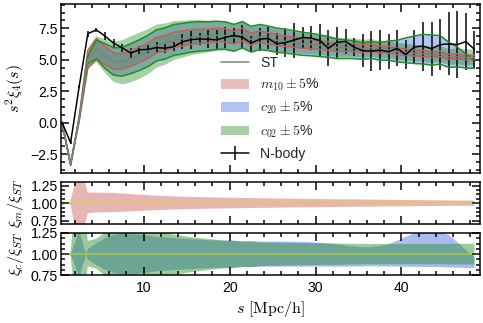

In [56]:
attribute = 'hexadecapole'

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3,sharex = True, squeeze = True,
   gridspec_kw = {'wspace':0, 'hspace':0.1, 'height_ratios':[4,1, 1]})

measured_attribute  = getattr(simulation, attribute)
ax1.errorbar(simulation.s_c, 
    simulation.s_c **2* measured_attribute.mean,
    yerr = simulation.s_c**2* measured_attribute.std,
    label = 'N-body ', color='black')

ax1.plot(simulation.s_c,
        simulation.s_c**2 * getattr(mf.m_10.increase, attribute),
        color = 'indianred')
ax1.plot(simulation.s_c,
        simulation.s_c**2 * getattr(mf.m_10.decrease, attribute),
        color = 'indianred')

ax1.plot(simulation.s_c,
        simulation.s_c**2 * getattr(mf.c_20.increase, attribute),
        color = 'forestgreen')
ax1.plot(simulation.s_c,
        simulation.s_c**2 * getattr(mf.c_20.decrease, attribute),
        color = 'forestgreen')



ax1.plot(simulation.s_c,
        simulation.s_c**2 * getattr(skewt, attribute),
        color = 'gray', label = 'ST')

ax1.fill_between(simulation.s_c, simulation.s_c**2 *getattr(mf.m_10.increase, attribute),
                 simulation.s_c**2 *getattr(mf.m_10.decrease, attribute), facecolor = 'indianred',
                alpha = 0.4, label = '$m_{10} \pm 5$%')

ax1.fill_between(simulation.s_c, simulation.s_c**2 *getattr(mf.c_20.increase, attribute),
                 simulation.s_c**2 *getattr(mf.c_20.decrease, attribute), facecolor = 'royalblue',
                alpha = 0.4, label = '$c_{20} \pm 5$%')

ax1.fill_between(simulation.s_c, simulation.s_c**2 *getattr(mf.c_02.increase, attribute),
                 simulation.s_c**2 *getattr(mf.c_02.decrease, attribute), facecolor = 'forestgreen',
                alpha = 0.4, label = '$c_{02} \pm 5$%')


ax2.fill_between(simulation.s_c,
                 getattr(mf.m_10.increase, attribute)/ getattr(skewt, attribute),
                 getattr(mf.m_10.decrease, attribute)/ getattr(skewt, attribute),
                 facecolor = 'indianred',
                 alpha = 0.45)

ax2.set_ylim(0.7,1.3)


ax2.fill_between(simulation.s_c,0.99, 1.01, facecolor = 'yellow', alpha = 0.4)

ax2.axhline(y = 1., linestyle='-', color='gray', alpha = 0.2)




ax3.fill_between(simulation.s_c,
                 getattr(mf.c_20.increase, attribute)/ getattr(skewt, attribute),
                 getattr(mf.c_20.decrease, attribute)/ getattr(skewt, attribute),
                 facecolor = 'royalblue',
                 alpha = 0.45)



ax3.fill_between(simulation.s_c,
                 getattr(mf.c_02.increase, attribute)/ getattr(skewt, attribute),
                 getattr(mf.c_02.decrease, attribute)/ getattr(skewt, attribute),
                 facecolor = 'forestgreen',
                 alpha = 0.45)


ax3.set_ylim(0.75,1.25)

ax3.fill_between(simulation.s_c,0.99, 1.01, facecolor = 'yellow', alpha = 0.4)

ax3.axhline(y = 1., linestyle='-', color='gray', alpha = 0.2)

ax1.set_xlim(0.4, 49.1)

ax1.set_ylabel(r'$s^2 \xi_4(s)$')

ax3.set_xlabel('$s \, \, \mathrm{[Mpc/h]}$')
ax2.set_ylabel(r'$\xi_{m}/\xi_{ST}$')
ax3.set_ylabel(r'$\xi_{c}/\xi_{ST}$')
ax1.legend()

## Gradual increments

(0, 60)

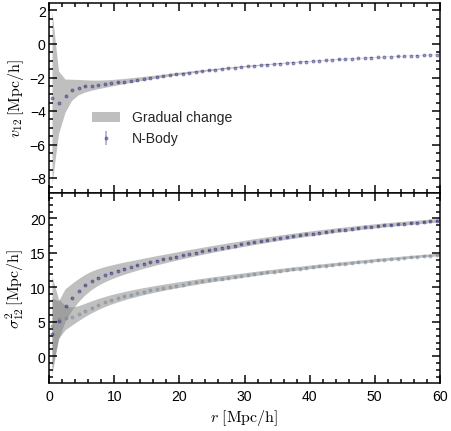

In [59]:
alpha_value = 0.4
fig, axes = plt.subplots(nrows=2,
                         ncols=1,sharex=True,
                        figsize = (7,7),
                         gridspec_kw = {'wspace':0, 'hspace':0})
# --------------- Mean --------------------------------------
axes[0].errorbar(simulation.r, 
             simulation.m_10.mean(simulation.r),
             yerr = simulation.m_10.std, linestyle = '',
             marker = 'o', color = 'midnightblue',
             label = 'N-Body', alpha = alpha_value)

axes[0].fill_between(simulation.r,
                 gradual_increase(simulation, 'm_10')(simulation.r),
                 gradual_decrease(simulation, 'm_10')(simulation.r),
                 facecolor = 'gray', alpha = 0.5, label = 'Gradual change'
                )

axes[0].set_ylabel('$v_{12} \, \mathrm{[Mpc/h]}$')
axes[0].legend( bbox_to_anchor = (0.5,0.5), frameon=False)

# --------------- STD --------------------------------------

axes[1].errorbar(simulation.r, 
             simulation.c_20.mean(simulation.r),
             yerr = simulation.c_20.std, linestyle = '',
             marker = 'o', color = 'midnightblue',
             label = 'Radial', alpha = alpha_value)

axes[1].fill_between(simulation.r,
                 gradual_increase(simulation, 'c_20')(simulation.r),
                 gradual_decrease(simulation, 'c_20')(simulation.r),
                 facecolor = 'gray', alpha = 0.5
                )

axes[1].errorbar(simulation.r, 
             simulation.c_02.mean(simulation.r), linestyle = '',
             yerr = simulation.c_02.std,marker = 'o', alpha = alpha_value,
             color = 'slategray', label = 'Tangential')


axes[1].fill_between(simulation.r,
                 gradual_increase(simulation, 'c_02')(simulation.r),
                 gradual_decrease(simulation, 'c_02')(simulation.r),
                 facecolor = 'gray', alpha = 0.5
                )

axes[1].set_ylabel('$\sigma_{12}^2 \, \mathrm{[Mpc/h]}$')

axes[1].set_xlabel('$r \, \, \mathrm{[Mpc/h]}$')
plt.xlim(0, 60)

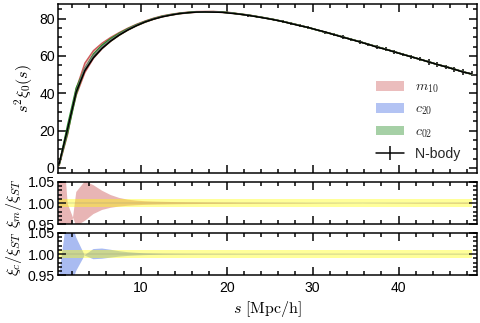

In [64]:
attribute = 'monopole'

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3,sharex = True, squeeze = True,
   gridspec_kw = {'wspace':0, 'hspace':0.1, 'height_ratios':[4,1, 1]})

measured_attribute  = getattr(simulation, attribute)
ax1.errorbar(simulation.s_c, 
    simulation.s_c **2* measured_attribute.mean,
    yerr = simulation.s_c**2* measured_attribute.std,
    label = 'N-body ', color='black')

ax1.plot(simulation.s_c,
        simulation.s_c**2 * getattr(mf.m_10.gradual_increase, attribute),
        color = 'indianred')
ax1.plot(simulation.s_c,
        simulation.s_c**2 * getattr(mf.m_10.gradual_decrease, attribute),
        color = 'indianred')

ax1.plot(simulation.s_c,
        simulation.s_c**2 * getattr(mf.c_20.gradual_increase, attribute),
        color = 'forestgreen')
ax1.plot(simulation.s_c,
        simulation.s_c**2 * getattr(mf.c_20.gradual_decrease, attribute),
        color = 'forestgreen')



ax1.plot(simulation.s_c,
        simulation.s_c**2 * getattr(skewt, attribute),
        color = 'gray')

ax1.fill_between(simulation.s_c, simulation.s_c**2 *getattr(mf.m_10.gradual_increase, attribute),
                 simulation.s_c**2 *getattr(mf.m_10.gradual_decrease, attribute), facecolor = 'indianred',
                alpha = 0.4, label = '$m_{10}$')

ax1.fill_between(simulation.s_c, simulation.s_c**2 *getattr(mf.c_20.gradual_increase, attribute),
                 simulation.s_c**2 *getattr(mf.c_20.gradual_decrease, attribute), facecolor = 'royalblue',
                alpha = 0.4, label = '$c_{20}$')


ax1.fill_between(simulation.s_c, simulation.s_c**2 *getattr(mf.c_02.gradual_increase, attribute),
                 simulation.s_c**2 *getattr(mf.c_02.gradual_decrease, attribute), facecolor = 'forestgreen',
                alpha = 0.4, label = '$c_{02}$')


ax2.fill_between(simulation.s_c,
                 getattr(mf.m_10.gradual_increase, attribute)/ getattr(skewt, attribute),
                 getattr(mf.m_10.gradual_decrease, attribute)/ getattr(skewt, attribute),
                 facecolor = 'indianred',
                 alpha = 0.45)

ax2.set_ylim(0.95,1.05)

ax2.fill_between(simulation.s_c,0.99, 1.01, facecolor = 'yellow', alpha = 0.4)

ax2.axhline(y = 1., linestyle='-', color='gray', alpha = 0.2)




ax3.fill_between(simulation.s_c,
                 getattr(mf.c_20.gradual_increase, attribute)/ getattr(skewt, attribute),
                 getattr(mf.c_20.gradual_decrease, attribute)/ getattr(skewt, attribute),
                 facecolor = 'royalblue',
                 alpha = 0.45)



ax3.fill_between(simulation.s_c,
                 getattr(mf.c_02.gradual_increase, attribute)/ getattr(skewt, attribute),
                 getattr(mf.c_02.gradual_decrease, attribute)/ getattr(skewt, attribute),
                 facecolor = 'forestgreen',
                 alpha = 0.45)


ax3.set_ylim(0.95,1.05)

ax3.fill_between(simulation.s_c,0.99, 1.01, facecolor = 'yellow', alpha = 0.4)

ax3.axhline(y = 1., linestyle='-', color='gray', alpha = 0.2)

ax1.set_xlim(0.4, 49.1)

ax1.set_ylabel(r'$s^2 \xi_0(s)$')

ax3.set_xlabel('$s \, \, \mathrm{[Mpc/h]}$')

ax3.set_xlabel('$s \, \, \mathrm{[Mpc/h]}$')
ax2.set_ylabel(r'$\xi_{m}/\xi_{ST}$')
ax3.set_ylabel(r'$\xi_{c}/\xi_{ST}$')
ax1.legend()

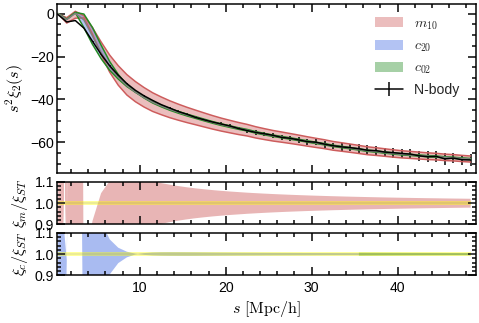

In [68]:
attribute = 'quadrupole'

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3,sharex = True, squeeze = True,
   gridspec_kw = {'wspace':0, 'hspace':0.1, 'height_ratios':[4,1, 1]})

measured_attribute  = getattr(simulation, attribute)
ax1.errorbar(simulation.s_c, 
    simulation.s_c **2* measured_attribute.mean,
    yerr = simulation.s_c**2* measured_attribute.std,
    label = 'N-body ', color='black')

ax1.plot(simulation.s_c,
        simulation.s_c**2 * getattr(mf.m_10.gradual_increase, attribute),
        color = 'indianred')
ax1.plot(simulation.s_c,
        simulation.s_c**2 * getattr(mf.m_10.gradual_decrease, attribute),
        color = 'indianred')

ax1.plot(simulation.s_c,
        simulation.s_c**2 * getattr(mf.c_20.gradual_increase, attribute),
        color = 'forestgreen')
ax1.plot(simulation.s_c,
        simulation.s_c**2 * getattr(mf.c_20.gradual_decrease, attribute),
        color = 'forestgreen')



ax1.plot(simulation.s_c,
        simulation.s_c**2 * getattr(skewt, attribute),
        color = 'gray')

ax1.fill_between(simulation.s_c, simulation.s_c**2 *getattr(mf.m_10.gradual_increase, attribute),
                 simulation.s_c**2 *getattr(mf.m_10.gradual_decrease, attribute), facecolor = 'indianred',
                alpha = 0.4, label = '$m_{10}$')

ax1.fill_between(simulation.s_c, simulation.s_c**2 *getattr(mf.c_20.gradual_increase, attribute),
                 simulation.s_c**2 *getattr(mf.c_20.gradual_decrease, attribute), facecolor = 'royalblue',
                alpha = 0.4, label = '$c_{20}$')


ax1.fill_between(simulation.s_c, simulation.s_c**2 *getattr(mf.c_02.gradual_increase, attribute),
                 simulation.s_c**2 *getattr(mf.c_02.gradual_decrease, attribute), facecolor = 'forestgreen',
                alpha = 0.4, label = '$c_{02}$')


ax2.fill_between(simulation.s_c,
                 getattr(mf.m_10.gradual_increase, attribute)/ getattr(skewt, attribute),
                 getattr(mf.m_10.gradual_decrease, attribute)/ getattr(skewt, attribute),
                 facecolor = 'indianred',
                 alpha = 0.45)

ax2.set_ylim(0.9,1.1)

ax2.fill_between(simulation.s_c,0.99, 1.01, facecolor = 'yellow', alpha = 0.4)

ax2.axhline(y = 1., linestyle='-', color='gray', alpha = 0.2)




ax3.fill_between(simulation.s_c,
                 getattr(mf.c_20.gradual_increase, attribute)/ getattr(skewt, attribute),
                 getattr(mf.c_20.gradual_decrease, attribute)/ getattr(skewt, attribute),
                 facecolor = 'royalblue',
                 alpha = 0.45)



ax3.fill_between(simulation.s_c,
                 getattr(mf.c_02.gradual_increase, attribute)/ getattr(skewt, attribute),
                 getattr(mf.c_02.gradual_decrease, attribute)/ getattr(skewt, attribute),
                 facecolor = 'forestgreen',
                 alpha = 0.45)


ax3.set_ylim(0.9,1.1)

ax3.fill_between(simulation.s_c,0.99, 1.01, facecolor = 'yellow', alpha = 0.4)

ax3.axhline(y = 1., linestyle='-', color='gray', alpha = 0.2)

ax1.set_xlim(0.4, 49.1)

ax1.set_ylabel(r'$s^2 \xi_2(s)$')

ax3.set_xlabel('$s \, \, \mathrm{[Mpc/h]}$')

ax3.set_xlabel('$s \, \, \mathrm{[Mpc/h]}$')
ax2.set_ylabel(r'$\xi_{m}/\xi_{ST}$')
ax3.set_ylabel(r'$\xi_{c}/\xi_{ST}$')
ax1.legend()

In [83]:
mf.c_02.gradual_decrease.hexadecapole

array([       nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
       0.0051161 , 0.00487689, 0.00450063, 0.00425391, 0.00394445,
       0.00370434, 0.00347942, 0.00328941, 0.00307856, 0.00297517,
       0.0027209 , 0.0026213 , 0.00247976, 0.00236776])

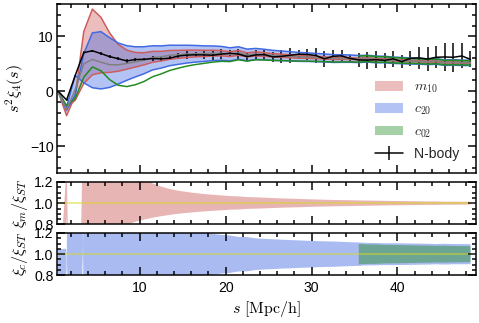

In [80]:
attribute = 'hexadecapole'


fig, (ax1, ax2, ax3) = plt.subplots(nrows=3,sharex = True, squeeze = True,
   gridspec_kw = {'wspace':0, 'hspace':0.1, 'height_ratios':[4,1, 1]})

measured_attribute  = getattr(simulation, attribute)
ax1.errorbar(simulation.s_c, 
    simulation.s_c **2* measured_attribute.mean,
    yerr = simulation.s_c**2* measured_attribute.std,
    label = 'N-body ', color='black')

ax1.plot(simulation.s_c,
        simulation.s_c**2 * getattr(mf.m_10.gradual_increase, attribute),
        color = 'indianred')
ax1.plot(simulation.s_c,
        simulation.s_c**2 * getattr(mf.m_10.gradual_decrease, attribute),
        color = 'indianred')

ax1.plot(simulation.s_c,
        simulation.s_c**2 * getattr(mf.c_20.gradual_increase, attribute),
        color = 'royalblue')
ax1.plot(simulation.s_c,
        simulation.s_c**2 * getattr(mf.c_20.gradual_decrease, attribute),
        color = 'royalblue')

ax1.plot(simulation.s_c,
        simulation.s_c**2 * getattr(mf.c_02.gradual_increase, attribute),
        color = 'forestgreen')
ax1.plot(simulation.s_c,
        simulation.s_c**2 * getattr(mf.c_02.gradual_decrease, attribute),
        color = 'forestgreen')



ax1.plot(simulation.s_c,
        simulation.s_c**2 * getattr(skewt, attribute),
        color = 'gray')

ax1.fill_between(simulation.s_c, simulation.s_c**2 *getattr(mf.m_10.gradual_increase, attribute),
                 simulation.s_c**2 *getattr(mf.m_10.gradual_decrease, attribute), facecolor = 'indianred',
                alpha = 0.4, label = '$m_{10}$')

ax1.fill_between(simulation.s_c, simulation.s_c**2 *getattr(mf.c_20.gradual_increase, attribute),
                 simulation.s_c**2 *getattr(mf.c_20.gradual_decrease, attribute), facecolor = 'royalblue',
                alpha = 0.4, label = '$c_{20}$')


ax1.fill_between(simulation.s_c, simulation.s_c**2 *getattr(mf.c_02.gradual_increase, attribute),
                 simulation.s_c**2 *getattr(mf.c_02.gradual_decrease, attribute), facecolor = 'forestgreen',
                alpha = 0.4, label = '$c_{02}$')


ax2.fill_between(simulation.s_c,
                 getattr(mf.m_10.gradual_increase, attribute)/ getattr(skewt, attribute),
                 getattr(mf.m_10.gradual_decrease, attribute)/ getattr(skewt, attribute),
                 facecolor = 'indianred',
                 alpha = 0.45)

ax2.set_ylim(0.8,1.2)

ax2.fill_between(simulation.s_c,0.99, 1.01, facecolor = 'yellow', alpha = 0.4)

ax2.axhline(y = 1., linestyle='-', color='gray', alpha = 0.2)




ax3.fill_between(simulation.s_c,
                 getattr(mf.c_20.gradual_increase, attribute)/ getattr(skewt, attribute),
                 getattr(mf.c_20.gradual_decrease, attribute)/ getattr(skewt, attribute),
                 facecolor = 'royalblue',
                 alpha = 0.45)



ax3.fill_between(simulation.s_c,
                 getattr(mf.c_02.gradual_increase, attribute)/ getattr(skewt, attribute),
                 getattr(mf.c_02.gradual_decrease, attribute)/ getattr(skewt, attribute),
                 facecolor = 'forestgreen',
                 alpha = 0.45)


ax3.set_ylim(0.8,1.2)

ax3.fill_between(simulation.s_c,0.99, 1.01, facecolor = 'yellow', alpha = 0.4)

ax3.axhline(y = 1., linestyle='-', color='gray', alpha = 0.2)

ax1.set_xlim(0.4, 49.1)

ax1.set_ylim(-15, 16)

ax1.set_ylabel(r'$s^2 \xi_4(s)$')

ax3.set_xlabel('$s \, \, \mathrm{[Mpc/h]}$')

ax3.set_xlabel('$s \, \, \mathrm{[Mpc/h]}$')
ax2.set_ylabel(r'$\xi_{m}/\xi_{ST}$')
ax3.set_ylabel(r'$\xi_{c}/\xi_{ST}$')
ax1.legend(loc = 'lower right')

## Expressed in standard error

Text(0.5,0,'$s \\, \\, \\mathrm{[Mpc/h]}$')

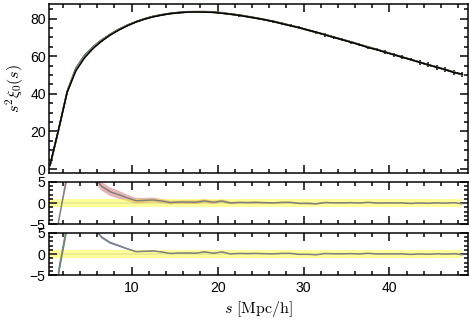

In [82]:
attribute = 'monopole'

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3,sharex = True, squeeze = True,
   gridspec_kw = {'wspace':0, 'hspace':0.1, 'height_ratios':[4,1, 1]})

measured_attribute  = getattr(simulation, attribute)
ax1.errorbar(simulation.s_c, 
    simulation.s_c **2* measured_attribute.mean,
    yerr = simulation.s_c**2* measured_attribute.std,
    label = 'N-body ', color='black')

ax1.plot(simulation.s_c,
        simulation.s_c**2 * getattr(mf.m_10.increase, attribute),
        color = 'indianred')
ax1.plot(simulation.s_c,
        simulation.s_c**2 * getattr(mf.m_10.decrease, attribute),
        color = 'indianred')

ax1.plot(simulation.s_c,
        simulation.s_c**2 * getattr(mf.c_20.increase, attribute),
        color = 'forestgreen')
ax1.plot(simulation.s_c,
        simulation.s_c**2 * getattr(mf.c_20.decrease, attribute),
        color = 'forestgreen')



ax1.plot(simulation.s_c,
        simulation.s_c**2 * getattr(skewt, attribute),
        color = 'gray')

ax1.fill_between(simulation.s_c, simulation.s_c**2 *getattr(mf.m_10.increase, attribute),
                 simulation.s_c**2 *getattr(mf.m_10.decrease, attribute), facecolor = 'indianred',
                alpha = 0.4)

ax1.fill_between(simulation.s_c, simulation.s_c**2 *getattr(mf.c_20.increase, attribute),
                 simulation.s_c**2 *getattr(mf.c_20.decrease, attribute), facecolor = 'forestgreen',
                alpha = 0.4)


ax2.fill_between(simulation.s_c,
                 (getattr(mf.m_10.increase, attribute)-measured_attribute.mean)/measured_attribute.std,
                 (getattr(mf.m_10.decrease, attribute)-measured_attribute.mean)/measured_attribute.std,
                 facecolor = 'indianred',
                 alpha = 0.45)
ax2.plot(simulation.s_c,
        (getattr(skewt, attribute)-measured_attribute.mean)/measured_attribute.std,
        color = 'gray')


ax2.set_ylim(-5,5)

ax2.fill_between(simulation.s_c,-1., 1., facecolor = 'yellow', alpha = 0.4)

ax2.axhline(y = 0., linestyle='-', color='gray', alpha = 0.2)

ax3.fill_between(simulation.s_c,
                 (getattr(mf.c_20.increase, attribute)-measured_attribute.mean)/measured_attribute.std,
                 (getattr(mf.c_20.decrease, attribute)-measured_attribute.mean)/measured_attribute.std,
                 facecolor = 'royalblue',
                 alpha = 0.65)



ax3.fill_between(simulation.s_c,
                 (getattr(mf.c_02.increase, attribute)-measured_attribute.mean)/measured_attribute.std,
                 (getattr(mf.c_02.decrease, attribute)-measured_attribute.mean)/measured_attribute.std,
                 facecolor = 'forestgreen',
                 alpha = 0.65)



ax3.plot(simulation.s_c,
        (getattr(skewt, attribute)-measured_attribute.mean)/measured_attribute.std,
        color = 'gray')

ax3.set_ylim(-5,5)

ax3.fill_between(simulation.s_c,-1., 1., facecolor = 'yellow', alpha = 0.4)

ax3.axhline(y = 0., linestyle='-', color='gray', alpha = 0.2)

ax1.set_xlim(0.4, 49.1)

ax1.set_ylabel(r'$s^2 \xi_0(s)$')

ax3.set_xlabel('$s \, \, \mathrm{[Mpc/h]}$')

(0.4, 49.1)

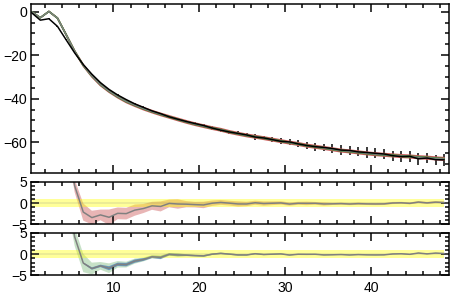

In [66]:
attribute = 'quadrupole'

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3,sharex = True, squeeze = True,
   gridspec_kw = {'wspace':0, 'hspace':0.1, 'height_ratios':[4,1, 1]})

measured_attribute  = getattr(simulation, attribute)
ax1.errorbar(simulation.s_c, 
    simulation.s_c **2* measured_attribute.mean,
    yerr = simulation.s_c**2* measured_attribute.std,
    label = 'N-body ', color='black')

ax1.plot(simulation.s_c,
        simulation.s_c**2 * getattr(mf.m_10.increase, attribute),
        color = 'indianred')
ax1.plot(simulation.s_c,
        simulation.s_c**2 * getattr(mf.m_10.decrease, attribute),
        color = 'indianred')

ax1.plot(simulation.s_c,
        simulation.s_c**2 * getattr(mf.c_20.increase, attribute),
        color = 'forestgreen')
ax1.plot(simulation.s_c,
        simulation.s_c**2 * getattr(mf.c_20.decrease, attribute),
        color = 'forestgreen')



ax1.plot(simulation.s_c,
        simulation.s_c**2 * getattr(skewt, attribute),
        color = 'gray')

ax1.fill_between(simulation.s_c, simulation.s_c**2 *getattr(mf.m_10.increase, attribute),
                 simulation.s_c**2 *getattr(mf.m_10.decrease, attribute), facecolor = 'indianred',
                alpha = 0.4)

ax1.fill_between(simulation.s_c, simulation.s_c**2 *getattr(mf.c_20.increase, attribute),
                 simulation.s_c**2 *getattr(mf.c_20.decrease, attribute), facecolor = 'forestgreen',
                alpha = 0.4)


ax2.fill_between(simulation.s_c,
                 (getattr(mf.m_10.increase, attribute)-measured_attribute.mean)/measured_attribute.std,
                 (getattr(mf.m_10.decrease, attribute)-measured_attribute.mean)/measured_attribute.std,
                 facecolor = 'indianred',
                 alpha = 0.45)
ax2.plot(simulation.s_c,
        (getattr(skewt, attribute)-measured_attribute.mean)/measured_attribute.std,
        color = 'gray')


ax2.set_ylim(-5,5)

ax2.fill_between(simulation.s_c,-1., 1., facecolor = 'yellow', alpha = 0.4)

ax2.axhline(y = 0., linestyle='-', color='gray', alpha = 0.2)

ax3.fill_between(simulation.s_c,
                 (getattr(mf.c_20.increase, attribute)-measured_attribute.mean)/measured_attribute.std,
                 (getattr(mf.c_20.decrease, attribute)-measured_attribute.mean)/measured_attribute.std,
                 facecolor = 'royalblue',
                 alpha = 0.65)



ax3.fill_between(simulation.s_c,
                 (getattr(mf.c_02.increase, attribute)-measured_attribute.mean)/measured_attribute.std,
                 (getattr(mf.c_02.decrease, attribute)-measured_attribute.mean)/measured_attribute.std,
                 facecolor = 'forestgreen',
                 alpha = 0.25)



ax3.plot(simulation.s_c,
        (getattr(skewt, attribute)-measured_attribute.mean)/measured_attribute.std,
        color = 'gray')

ax3.set_ylim(-5,5)

ax3.fill_between(simulation.s_c,-1., 1., facecolor = 'yellow', alpha = 0.4)

ax3.axhline(y = 0., linestyle='-', color='gray', alpha = 0.2)

ax1.set_xlim(0.4, 49.1)

(0.4, 49.1)

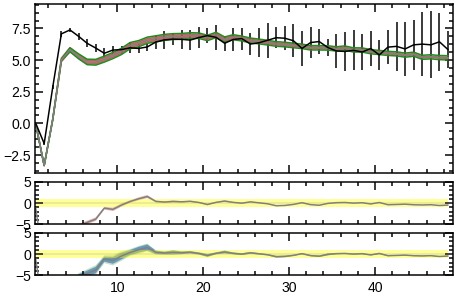

In [67]:
attribute = 'hexadecapole'

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3,sharex = True, squeeze = True,
   gridspec_kw = {'wspace':0, 'hspace':0.1, 'height_ratios':[4,1, 1]})

measured_attribute  = getattr(simulation, attribute)
ax1.errorbar(simulation.s_c, 
    simulation.s_c **2* measured_attribute.mean,
    yerr = simulation.s_c**2* measured_attribute.std,
    label = 'N-body ', color='black')

ax1.plot(simulation.s_c,
        simulation.s_c**2 * getattr(mf.m_10.increase, attribute),
        color = 'indianred')
ax1.plot(simulation.s_c,
        simulation.s_c**2 * getattr(mf.m_10.decrease, attribute),
        color = 'indianred')

ax1.plot(simulation.s_c,
        simulation.s_c**2 * getattr(mf.c_20.increase, attribute),
        color = 'forestgreen')
ax1.plot(simulation.s_c,
        simulation.s_c**2 * getattr(mf.c_20.decrease, attribute),
        color = 'forestgreen')



ax1.plot(simulation.s_c,
        simulation.s_c**2 * getattr(skewt, attribute),
        color = 'gray')

ax1.fill_between(simulation.s_c, simulation.s_c**2 *getattr(mf.m_10.increase, attribute),
                 simulation.s_c**2 *getattr(mf.m_10.decrease, attribute), facecolor = 'indianred',
                alpha = 0.4)

ax1.fill_between(simulation.s_c, simulation.s_c**2 *getattr(mf.c_20.increase, attribute),
                 simulation.s_c**2 *getattr(mf.c_20.decrease, attribute), facecolor = 'forestgreen',
                alpha = 0.4)


ax2.fill_between(simulation.s_c,
                 (getattr(mf.m_10.increase, attribute)-measured_attribute.mean)/measured_attribute.std,
                 (getattr(mf.m_10.decrease, attribute)-measured_attribute.mean)/measured_attribute.std,
                 facecolor = 'indianred',
                 alpha = 0.45)
ax2.plot(simulation.s_c,
        (getattr(skewt, attribute)-measured_attribute.mean)/measured_attribute.std,
        color = 'gray')


ax2.set_ylim(-5,5)

ax2.fill_between(simulation.s_c,-1., 1., facecolor = 'yellow', alpha = 0.4)

ax2.axhline(y = 0., linestyle='-', color='gray', alpha = 0.2)

ax3.fill_between(simulation.s_c,
                 (getattr(mf.c_20.increase, attribute)-measured_attribute.mean)/measured_attribute.std,
                 (getattr(mf.c_20.decrease, attribute)-measured_attribute.mean)/measured_attribute.std,
                 facecolor = 'royalblue',
                 alpha = 0.65)



ax3.fill_between(simulation.s_c,
                 (getattr(mf.c_02.increase, attribute)-measured_attribute.mean)/measured_attribute.std,
                 (getattr(mf.c_02.decrease, attribute)-measured_attribute.mean)/measured_attribute.std,
                 facecolor = 'forestgreen',
                 alpha = 0.25)



ax3.plot(simulation.s_c,
        (getattr(skewt, attribute)-measured_attribute.mean)/measured_attribute.std,
        color = 'gray')

ax3.set_ylim(-5,5)

ax3.fill_between(simulation.s_c,-1., 1., facecolor = 'yellow', alpha = 0.4)

ax3.axhline(y = 0., linestyle='-', color='gray', alpha = 0.2)

ax1.set_xlim(0.4, 49.1)

(0.4, 49.1)

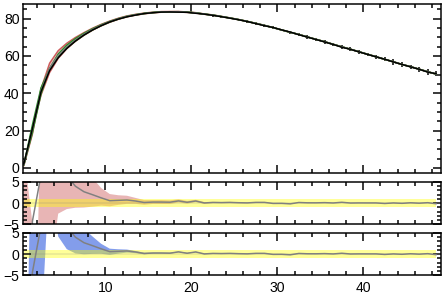

In [70]:
attribute = 'monopole'

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3,sharex = True, squeeze = True,
   gridspec_kw = {'wspace':0, 'hspace':0.1, 'height_ratios':[4,1, 1]})

measured_attribute  = getattr(simulation, attribute)
ax1.errorbar(simulation.s_c, 
    simulation.s_c **2* measured_attribute.mean,
    yerr = simulation.s_c**2* measured_attribute.std,
    label = 'N-body ', color='black')

ax1.plot(simulation.s_c,
        simulation.s_c**2 * getattr(mf.m_10.gradual_increase, attribute),
        color = 'indianred')
ax1.plot(simulation.s_c,
        simulation.s_c**2 * getattr(mf.m_10.gradual_decrease, attribute),
        color = 'indianred')

ax1.plot(simulation.s_c,
        simulation.s_c**2 * getattr(mf.c_20.gradual_increase, attribute),
        color = 'forestgreen')
ax1.plot(simulation.s_c,
        simulation.s_c**2 * getattr(mf.c_20.gradual_decrease, attribute),
        color = 'forestgreen')



ax1.plot(simulation.s_c,
        simulation.s_c**2 * getattr(skewt, attribute),
        color = 'gray')

ax1.fill_between(simulation.s_c, simulation.s_c**2 *getattr(mf.m_10.gradual_increase, attribute),
                 simulation.s_c**2 *getattr(mf.m_10.gradual_decrease, attribute), facecolor = 'indianred',
                alpha = 0.4)

ax1.fill_between(simulation.s_c, simulation.s_c**2 *getattr(mf.c_20.gradual_increase, attribute),
                 simulation.s_c**2 *getattr(mf.c_20.gradual_decrease, attribute), facecolor = 'forestgreen',
                alpha = 0.4)


ax2.fill_between(simulation.s_c,
                 (getattr(mf.m_10.gradual_increase, attribute)-measured_attribute.mean)/measured_attribute.std,
                 (getattr(mf.m_10.gradual_decrease, attribute)-measured_attribute.mean)/measured_attribute.std,
                 facecolor = 'indianred',
                 alpha = 0.45)
ax2.plot(simulation.s_c,
        (getattr(skewt, attribute)-measured_attribute.mean)/measured_attribute.std,
        color = 'gray')


ax2.set_ylim(-5,5)

ax2.fill_between(simulation.s_c,-1., 1., facecolor = 'yellow', alpha = 0.4)

ax2.axhline(y = 0., linestyle='-', color='gray', alpha = 0.2)

ax3.fill_between(simulation.s_c,
                 (getattr(mf.c_20.gradual_increase, attribute)-measured_attribute.mean)/measured_attribute.std,
                 (getattr(mf.c_20.gradual_decrease, attribute)-measured_attribute.mean)/measured_attribute.std,
                 facecolor = 'royalblue',
                 alpha = 0.65)



ax3.fill_between(simulation.s_c,
                 (getattr(mf.c_02.gradual_increase, attribute)-measured_attribute.mean)/measured_attribute.std,
                 (getattr(mf.c_02.gradual_decrease, attribute)-measured_attribute.mean)/measured_attribute.std,
                 facecolor = 'forestgreen',
                 alpha = 0.25)



ax3.plot(simulation.s_c,
        (getattr(skewt, attribute)-measured_attribute.mean)/measured_attribute.std,
        color = 'gray')

ax3.set_ylim(-5,5)

ax3.fill_between(simulation.s_c,-1., 1., facecolor = 'yellow', alpha = 0.4)

ax3.axhline(y = 0., linestyle='-', color='gray', alpha = 0.2)

ax1.set_xlim(0.4, 49.1)

(0.4, 49.1)

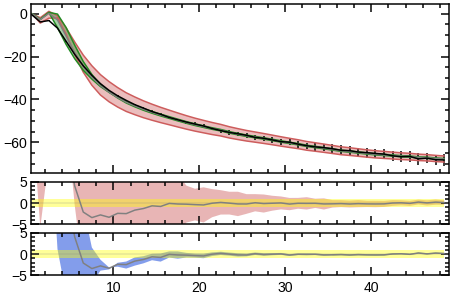

In [71]:
attribute = 'quadrupole'

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3,sharex = True, squeeze = True,
   gridspec_kw = {'wspace':0, 'hspace':0.1, 'height_ratios':[4,1, 1]})

measured_attribute  = getattr(simulation, attribute)
ax1.errorbar(simulation.s_c, 
    simulation.s_c **2* measured_attribute.mean,
    yerr = simulation.s_c**2* measured_attribute.std,
    label = 'N-body ', color='black')

ax1.plot(simulation.s_c,
        simulation.s_c**2 * getattr(mf.m_10.gradual_increase, attribute),
        color = 'indianred')
ax1.plot(simulation.s_c,
        simulation.s_c**2 * getattr(mf.m_10.gradual_decrease, attribute),
        color = 'indianred')

ax1.plot(simulation.s_c,
        simulation.s_c**2 * getattr(mf.c_20.gradual_increase, attribute),
        color = 'forestgreen')
ax1.plot(simulation.s_c,
        simulation.s_c**2 * getattr(mf.c_20.gradual_decrease, attribute),
        color = 'forestgreen')



ax1.plot(simulation.s_c,
        simulation.s_c**2 * getattr(skewt, attribute),
        color = 'gray')

ax1.fill_between(simulation.s_c, simulation.s_c**2 *getattr(mf.m_10.gradual_increase, attribute),
                 simulation.s_c**2 *getattr(mf.m_10.gradual_decrease, attribute), facecolor = 'indianred',
                alpha = 0.4)

ax1.fill_between(simulation.s_c, simulation.s_c**2 *getattr(mf.c_20.gradual_increase, attribute),
                 simulation.s_c**2 *getattr(mf.c_20.gradual_decrease, attribute), facecolor = 'forestgreen',
                alpha = 0.4)


ax2.fill_between(simulation.s_c,
                 (getattr(mf.m_10.gradual_increase, attribute)-measured_attribute.mean)/measured_attribute.std,
                 (getattr(mf.m_10.gradual_decrease, attribute)-measured_attribute.mean)/measured_attribute.std,
                 facecolor = 'indianred',
                 alpha = 0.45)
ax2.plot(simulation.s_c,
        (getattr(skewt, attribute)-measured_attribute.mean)/measured_attribute.std,
        color = 'gray')


ax2.set_ylim(-5,5)

ax2.fill_between(simulation.s_c,-1., 1., facecolor = 'yellow', alpha = 0.4)

ax2.axhline(y = 0., linestyle='-', color='gray', alpha = 0.2)

ax3.fill_between(simulation.s_c,
                 (getattr(mf.c_20.gradual_increase, attribute)-measured_attribute.mean)/measured_attribute.std,
                 (getattr(mf.c_20.gradual_decrease, attribute)-measured_attribute.mean)/measured_attribute.std,
                 facecolor = 'royalblue',
                 alpha = 0.65)



ax3.fill_between(simulation.s_c,
                 (getattr(mf.c_02.gradual_increase, attribute)-measured_attribute.mean)/measured_attribute.std,
                 (getattr(mf.c_02.gradual_decrease, attribute)-measured_attribute.mean)/measured_attribute.std,
                 facecolor = 'forestgreen',
                 alpha = 0.25)



ax3.plot(simulation.s_c,
        (getattr(skewt, attribute)-measured_attribute.mean)/measured_attribute.std,
        color = 'gray')

ax3.set_ylim(-5,5)

ax3.fill_between(simulation.s_c,-1., 1., facecolor = 'yellow', alpha = 0.4)

ax3.axhline(y = 0., linestyle='-', color='gray', alpha = 0.2)

ax1.set_xlim(0.4, 49.1)

(0.4, 49.1)

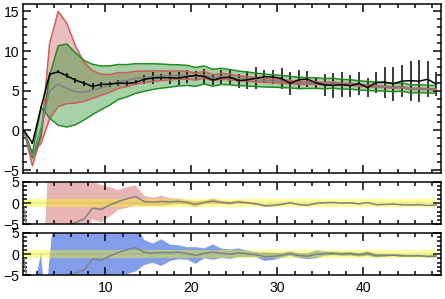

In [73]:
attribute = 'hexadecapole'

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3,sharex = True, squeeze = True,
   gridspec_kw = {'wspace':0, 'hspace':0.1, 'height_ratios':[4,1, 1]})

measured_attribute  = getattr(simulation, attribute)
ax1.errorbar(simulation.s_c, 
    simulation.s_c **2* measured_attribute.mean,
    yerr = simulation.s_c**2* measured_attribute.std,
    label = 'N-body ', color='black')

ax1.plot(simulation.s_c,
        simulation.s_c**2 * getattr(mf.m_10.gradual_increase, attribute),
        color = 'indianred')
ax1.plot(simulation.s_c,
        simulation.s_c**2 * getattr(mf.m_10.gradual_decrease, attribute),
        color = 'indianred')

ax1.plot(simulation.s_c,
        simulation.s_c**2 * getattr(mf.c_20.gradual_increase, attribute),
        color = 'forestgreen')
ax1.plot(simulation.s_c,
        simulation.s_c**2 * getattr(mf.c_20.gradual_decrease, attribute),
        color = 'forestgreen')



ax1.plot(simulation.s_c,
        simulation.s_c**2 * getattr(skewt, attribute),
        color = 'gray')

ax1.fill_between(simulation.s_c, simulation.s_c**2 *getattr(mf.m_10.gradual_increase, attribute),
                 simulation.s_c**2 *getattr(mf.m_10.gradual_decrease, attribute), facecolor = 'indianred',
                alpha = 0.4)

ax1.fill_between(simulation.s_c, simulation.s_c**2 *getattr(mf.c_20.gradual_increase, attribute),
                 simulation.s_c**2 *getattr(mf.c_20.gradual_decrease, attribute), facecolor = 'forestgreen',
                alpha = 0.4)


ax2.fill_between(simulation.s_c,
                 (getattr(mf.m_10.gradual_increase, attribute)-measured_attribute.mean)/measured_attribute.std,
                 (getattr(mf.m_10.gradual_decrease, attribute)-measured_attribute.mean)/measured_attribute.std,
                 facecolor = 'indianred',
                 alpha = 0.45)
ax2.plot(simulation.s_c,
        (getattr(skewt, attribute)-measured_attribute.mean)/measured_attribute.std,
        color = 'gray')


ax2.set_ylim(-5,5)

ax2.fill_between(simulation.s_c,-1., 1., facecolor = 'yellow', alpha = 0.4)

ax2.axhline(y = 0., linestyle='-', color='gray', alpha = 0.2)

ax3.fill_between(simulation.s_c,
                 (getattr(mf.c_20.gradual_increase, attribute)-measured_attribute.mean)/measured_attribute.std,
                 (getattr(mf.c_20.gradual_decrease, attribute)-measured_attribute.mean)/measured_attribute.std,
                 facecolor = 'royalblue',
                 alpha = 0.65)



ax3.fill_between(simulation.s_c,
                 (getattr(mf.c_02.gradual_increase, attribute)-measured_attribute.mean)/measured_attribute.std,
                 (getattr(mf.c_02.gradual_decrease, attribute)-measured_attribute.mean)/measured_attribute.std,
                 facecolor = 'forestgreen',
                 alpha = 0.25)



ax3.plot(simulation.s_c,
        (getattr(skewt, attribute)-measured_attribute.mean)/measured_attribute.std,
        color = 'gray')

ax3.set_ylim(-5,5)

ax3.fill_between(simulation.s_c,-1., 1., facecolor = 'yellow', alpha = 0.4)

ax3.axhline(y = 0., linestyle='-', color='gray', alpha = 0.2)

ax1.set_xlim(0.4, 49.1)